In [1]:
from matplotlib import pyplot as plt 
import tensorflow as tf 
from tensorflow import keras 
print(tf.__version__) 
print(keras.__version__)

2.4.1
2.4.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist 
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
import numpy as np 
print(X_train_full.shape) 
print(y_train_full.shape) 
print(np.unique(y_train_full)) 
print(X_test.shape) 
print(y_test.shape)

(60000, 28, 28)
(60000,)
[0 1 2 3 4 5 6 7 8 9]
(10000, 28, 28)
(10000,)


In [4]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:] 
X_test = X_test/255.0

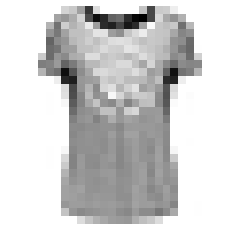

0


In [5]:
plt.imshow(X_train[1], cmap="binary") 
#retira ejes numericos
plt.axis('off') 
plt.show() 
print(y_train[1])

In [18]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [6]:
model = keras.models.Sequential() 
#adciona capas

#capa entrada
model.add(keras.layers.Flatten(input_shape=[28, 28])) 

# capas ocultas
model.add(keras.layers.Dense(300,activation="relu")) 
model.add(keras.layers.Dense(100,activation="relu")) 
model.add(keras.layers.Dense(10,activation="softmax"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
# fetch a layer by its index 
hidden1 = model.layers[1] 
# fetch it by name: 
hidden1.name
weights, biases = hidden1.get_weights() 
print(weights) 
print(biases)

[[-0.02840132  0.03679618 -0.02621623 ...  0.01442634  0.06341173
  -0.00055165]
 [-0.00262415  0.03352553 -0.03539145 ...  0.06767645 -0.06096256
  -0.06090484]
 [-0.07382362  0.0416548  -0.01035804 ...  0.0245118  -0.07071386
   0.0166631 ]
 ...
 [ 0.06832488  0.06810461 -0.0424094  ...  0.06226277  0.02960405
  -0.00435951]
 [-0.00885843  0.06848404 -0.06067602 ...  0.00359546  0.02633855
  -0.03596848]
 [ 0.065033    0.01555789 -0.01700414 ... -0.02986056 -0.04463321
  -0.0652127 ]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [9]:
# After a model is created, call its compile() method to specify the less function and the optimizer to use 
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [10]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.9616 - accuracy: 0.6965 - val_loss: 0.4873 - val_accuracy: 0.8398
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5027 - accuracy: 0.8275 - val_loss: 0.4723 - val_accuracy: 0.8304
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4463 - accuracy: 0.8428 - val_loss: 0.4154 - val_accuracy: 0.8588
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4201 - accuracy: 0.8542 - val_loss: 0.4247 - val_accuracy: 0.8534
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3989 - accuracy: 0.8592 - val_loss: 0.3942 - val_accuracy: 0.8674
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3818 - accuracy: 0.8654 - val_loss: 0.3865 - val_accuracy: 0.8638
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3679 - accuracy: 0.8700 - val_loss: 0.3764 - val_accuracy:

<bound method Callback.on_predict_begin of <tensorflow.python.keras.callbacks.History object at 0x7f0c2ad0b6a0>>

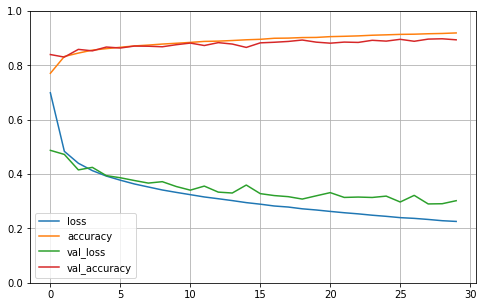

In [11]:
import pandas as pd 
import matplotlib.pyplot as plt 
pd.DataFrame(history.history).plot(figsize=(8,5)) 
plt.grid(True) 
plt.gca().set_ylim(0,1) 
plt.show()

In [12]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3378 - accuracy: 0.8823


[0.3378303349018097, 0.8823000192642212]

In [19]:
# Using the model to make predictions 
# Use the first three instances of he test set 
X_new = X_test[:3] 
y_prob =model.predict(X_new) 
y_prob.round(2)
y_pred = (model.predict(X_new) > 0.5).astype("int32") 
np.array(class_names)[y_pred]

array([['T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'Trouser'],
       ['T-shirt/top', 'T-shirt/top', 'Trouser', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top'],
       ['T-shirt/top', 'Trouser', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top']], dtype='<U11')